In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
def df_to_arr(df):
    
    vals = []
    for _, row in df.iterrows():
        vals.extend(row.tolist())
    return np.array([x for x in vals if str(x) != 'nan'])

In [3]:
def t_test(vals1, vals2, df):
    
    var1 = vals1.var(ddof=1)
    var2 = vals2.var(ddof=1)
    N1 = len(vals1)
    N2 = len(vals2)
    s = np.sqrt(((var1**2)/N1 + (var2**2)/N2))
    t = (np.mean(vals1) - np.mean(vals2))/s

    return scipy.stats.t.cdf(t, df=df)

# Visualizing Data Distribution

Text(0.5, 69.0, 'Inner Subject')

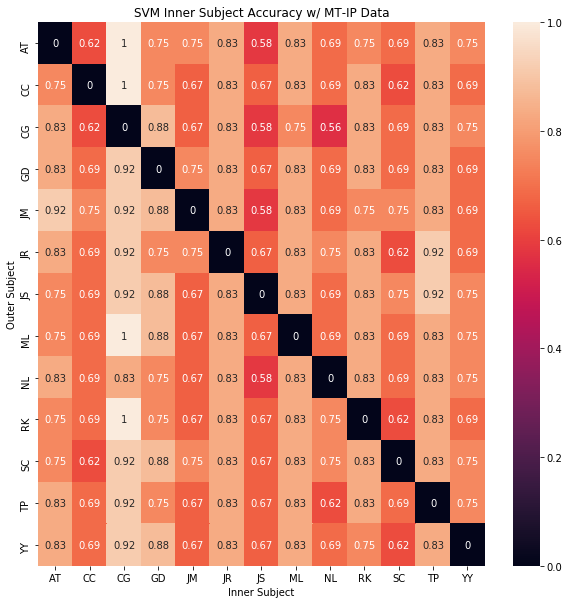

In [674]:
inner_accs = pd.read_csv('output/ip/inner_accs.csv', index_col=0)

plt.figure(figsize=(10,10))
ax = sns.heatmap(inner_accs.fillna(value=0), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('SVM Inner Subject Accuracy w/ MT-IP Data')
ax.set_ylabel('Outer Subject')
ax.set_xlabel('Inner Subject')
# plt.savefig('output/ip/inner_accs_heatmap.png')

Text(0.5, 69.0, 'Inner Subject')

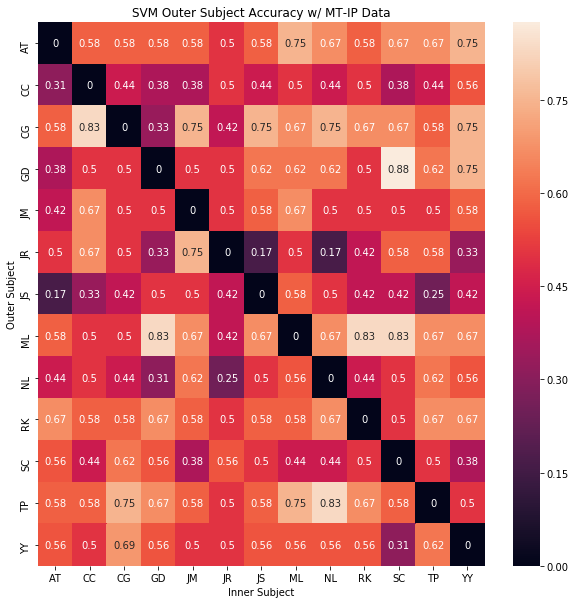

In [635]:
outer_accs = pd.read_csv('output/ip/outer_accs.csv', index_col=0)

plt.figure(figsize=(10,10))
ax = sns.heatmap(outer_accs.fillna(value=0), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('SVM Outer Subject Accuracy w/ MT-IP Data')
ax.set_ylabel('Outer Subject')
ax.set_xlabel('Inner Subject')
# plt.savefig('output/ip/outer_accs_heatmap.png')

Text(0.5, 1.0, 'Distribution of Outer Subject Testing Accuracies')

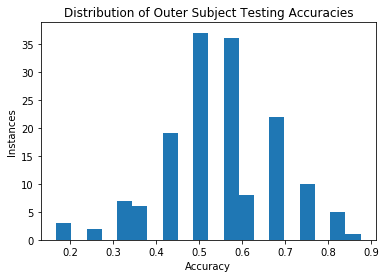

In [636]:
plt.hist(df_to_arr(outer_accs), bins=20)
plt.xlabel('Accuracy')
plt.ylabel('Instances')
plt.title('Distribution of Outer Subject Testing Accuracies')
#plt.savefig('output/rank/outer_accs32_rank_hist.png')

# IP Significance Tests

In [18]:
num_subjects = 13
run_size = num_subjects * (num_subjects-1)

### 1. Paired t-test

In [19]:
outer_scrambled = np.load('output/ip/outer_perms.npy')
num_runs = len(outer_scrambled) // run_size

Text(0, 0.5, 'Frequency')

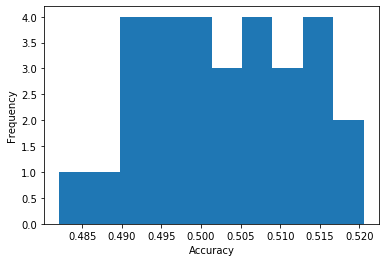

In [20]:
avgs = []
for i in range(len(outer_scrambled)//run_size):
    sample = outer_scrambled[run_size*i:run_size*(i+1)]
    avgs.append(np.mean(sample))
plt.hist(avgs, bins=10)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

In [21]:
df = pd.DataFrame(columns=[f'{i}' for i in range(1, run_size+1)])
for i in range(num_runs):
    df.loc[len(df)] = outer_scrambled[i*run_size:(i+1)*run_size].tolist()

dfr = pd.DataFrame(columns=[i for i in range(1, run_size+1)])
dfr['Index'] = [i for i in range(num_runs)]
dfr = dfr.drop(['Index'], axis=1)

counter = 1
for i in range(num_subjects-1):
    dfr[counter] = df[f'{num_subjects+i*(num_subjects-1)}']
    counter+=1

for i in range(1, num_subjects+1):
    if i == num_subjects:
        continue
    for j in range(1, num_subjects):
        dfr[counter] = df[f'{(j-1)*(num_subjects-1)+i}']
        counter += 1

In [42]:
dfr.loc['Sum',:] = dfr.sum(axis=0)
sums = list(dfr.loc['Sum'])
avgs_scrambled = []

num_runs = len(outer_scrambled)//run_size
for i in range(num_subjects):
    avg = sum(sums[i*(num_subjects-1):(i+1)*(num_subjects-1)])/num_runs/(num_subjects-1)
    avgs_scrambled.append(avg)

In [43]:
outer_unscrambled = df_to_arr(pd.read_csv('output/ip/outer_accs.csv', index_col=0))
avgs_unscrambled = []

for i in range(num_subjects):
    avg = sum(outer_unscrambled[i*(num_subjects-1):(i+1)*(num_subjects-1)])/(num_subjects-1)
    avgs_unscrambled.append(avg)

In [44]:
scipy.stats.ttest_rel(avgs_unscrambled, avgs_scrambled)

Ttest_relResult(statistic=1.792658453194499, pvalue=0.09825283066469387)

### 2. Paired t-test with Danny's data

In [46]:
danny_data = [0.6666666667,0.4166666667,0.5833333333,0.5,0.5833333333,0.6666666667,0.5,0.5833333333,0.5,0.5833333333,0.6666666667,0.5833333333,0.4375,0.5625,0.5625,0.5625,0.5,0.5,0.4375,0.625,0.5,0.5625,0.4375,0.5,0.75,0.75,0.8333333333,0.4166666667,0.5833333333,0.75,0.75,0.5833333333,0.8333333333,0.6666666667,0.8333333333,0.75,0.5,0.625,0.75,0.5,0.625,0.75,0.625,0.625,0.625,0.375,0.625,0.875,0.5,0.5,0.6666666667,0.5,0.5833333333,0.5833333333,0.5,0.3333333333,0.5833333333,0.5,0.5,0.5833333333,0.4166666667,0.5,0.4166666667,0.3333333333,0.25,0.25,0.4166666667,0.4166666667,0.4166666667,0.1666666667,0.5,0.25,0.4166666667,0.3333333333,0.4166666667,0.4166666667,0.4166666667,0.25,0.25,0.25,0.3333333333,0.25,0.25,0.4166666667,0.8333333333,0.6666666667,0.5833333333,0.6666666667,0.3333333333,0.75,0.75,0.6666666667,0.75,0.75,0.6666666667,0.6666666667,0.4375,0.4375,0.5625,0.625,0.25,0.5625,0.5625,0.5625,0.3125,0.5,0.5,0.625,0.75,0.6666666667,0.75,0.5833333333,0.5,0.5833333333,0.75,0.5,0.6666666667,0.75,0.75,0.6666666667,0.625,0.5,0.4375,0.4375,0.625,0.375,0.5,0.5,0.5,0.3125,0.5,0.625,0.5833333333,0.5,0.5,0.5833333333,0.5833333333,0.5833333333,0.5833333333,0.5833333333,0.5833333333,0.5833333333,0.5,0.5833333333,0.5625,0.4375,0.5,0.625,0.5,0.5625,0.5625,0.5625,0.5625,0.4375,0.5,0.5625]
outer_unscrambled = df_to_arr(pd.read_csv('output/ip/outer_accs.csv', index_col=0))
avgs_unscrambled = []

for i in range(num_subjects):
    avg = (sum(outer_unscrambled[i*(num_subjects-1):(i+1)*(num_subjects-1)])+sum(danny_data[i*(num_subjects-1):(i+1)*(num_subjects-1)]))/(2*(num_subjects-1))
    avgs_unscrambled.append(avg)

In [26]:
dfr = dfr.drop(['Sum'])
dfr2 = pd.read_csv('output/ip/danny_data.csv', header=None)
dfr2.columns = [i for i in range(1, 157)]
dfr3 = dfr.append(dfr2)
dfr3 = dfr3.reset_index(drop=True)
dfr3.loc['Sum',:] = dfr3.sum(axis=0)

In [27]:
num_runs = 60
sums = list(dfr3.loc['Sum'])

avgs_scrambled = []
for i in range(num_subjects):
    avg = sum(sums[i*(num_subjects-1):(i+1)*(num_subjects-1)])/num_runs/(num_subjects-1)
    avgs_scrambled.append(avg)

In [28]:
scipy.stats.ttest_rel(avgs_unscrambled, avgs_scrambled)

Ttest_relResult(statistic=1.635352800257121, pvalue=0.12791601141537487)

### 3. Z significance test

In [795]:
outer_scrambled = np.load('output/ip/outer_perms.npy')
avgs_scrambled = []
for i in range(len(outer_scrambled)//run_size):
    sample = outer_scrambled[run_size*i:run_size*(i+1)]
    avgs_scrambled.append(np.mean(sample))
    
avgs_mean = np.mean(avgs_scrambled)
avgs_std = np.std(avgs_scrambled)

outer_unscrambled = df_to_arr(pd.read_csv('output/ip/outer_accs.csv', index_col=0))
avg_unscrambled = np.mean(outer_unscrambled)

z_score = (avg_unscrambled - avgs_mean) / avgs_std
print(f"z-score: {z_score}")
print(f"p-value: {scipy.stats.norm.sf(abs(z_score))}")

z-score: 4.583417984504938
p-value: 2.2871817584968238e-06


In [797]:
np.mean(avgs_scrambled)

0.5026219729344731

### 4. Z significance test with Danny's data

In [761]:
outer_scrambled = np.load('output/ip/outer_perms.npy')
avgs_scrambled = []
for i in range(len(outer_scrambled)//run_size):
    sample = outer_scrambled[run_size*i:run_size*(i+1)]
    avgs_scrambled.append(np.mean(sample))
avgs_scrambled.extend([0.4865117521,0.4978632479,0.5048076923,0.4903846154,0.5069444444,0.5070779915,0.4966613248,0.5088141026,0.4854433761,0.515892094,0.5106837607,0.5166933761,0.5141559829,0.5092147436,0.5106837607,0.4949252137,0.5084134615,0.4975961538,0.5032051282,0.5081463675,0.5108173077,0.4973290598,0.4983974359,0.5073450855,0.4974626068,0.5036057692,0.4957264957,0.4955929487,0.4921207265,0.499599359])
    
avgs_mean = np.mean(avgs_scrambled)
avgs_std = np.std(avgs_scrambled)

outer_unscrambled = df_to_arr(pd.read_csv('output/ip/outer_accs.csv', index_col=0))
avg_unscrambled = np.mean(outer_unscrambled)

z_score = (avg_unscrambled - avgs_mean) / avgs_std
print(f"z-score: {z_score}")
print(f"p-value: {scipy.stats.norm.sf(abs(z_score))}")

z-score: 4.877023949193285
p-value: 5.384918190956188e-07


### 5. Intrasubject paired t-test

In [677]:
num_runs = 30
sub_num_per_run = 200
num_subjects = 13

scrambled_data = np.load('output/ip/outer_perms_within.npy')
avg_data_unscrambled = pd.read_csv('output/ip/outer_accs_within.csv', index_col=0)['Average'].tolist()

avg_data_scrambled = []
for i in range(num_subjects):
    subj_data = []
    for j in range(num_runs):
        subj_data.extend(scrambled_data[sub_num_per_run*num_subjects*j+sub_num_per_run*i:sub_num_per_run*num_subjects*j+sub_num_per_run*(i+1)])
    avg_data_scrambled.append(np.mean(subj_data))
    
scipy.stats.ttest_rel(avg_data_unscrambled, avg_data_scrambled)

Ttest_relResult(statistic=19.95415107573414, pvalue=1.4326660368747702e-10)

### 6. Intrasubject z significance test

In [623]:
avg_unscrambled = np.mean(df_to_arr(pd.read_csv('output/ip/outer_accs_within.csv', index_col=0).drop(['Average'], axis=1)))

scrambled_data = np.load('output/ip/outer_perms_within.npy')
avgs_scrambled = []
for i in range(num_runs):
    avgs_scrambled.append(np.mean(scrambled_data[i*sub_num_per_run*num_subjects: (i+1)*sub_num_per_run*num_subjects]))
    
avgs_mean = np.mean(avgs_scrambled)
avgs_std = np.std(avgs_scrambled)    
    
z_score = (avg_unscrambled - avgs_mean) / avgs_std
print(f"z-score: {z_score}")
print(f"p-value: {scipy.stats.norm.sf(abs(z_score))}")


z-score: 57.74933074143386
p-value: 0.0


# CP Significance Tests

### 1. Paired t-test

In [783]:
scrambled_data = np.load('output/cp/outer_perms.npy')
avgs_scrambled = []

num_subjects = 13
num_runs = 30
sub_num_per_run=num_subjects-1
for i in range(num_subjects):
    
    subj_vals = []
    for j in range(num_runs):
        subj_vals.extend(scrambled_data[sub_num_per_run*num_subjects*j+sub_num_per_run*i:sub_num_per_run*num_subjects*j+sub_num_per_run*(i+1)])
    avgs_scrambled.append(np.mean(subj_vals))

unscrambled_data = df_to_arr(pd.read_csv('output/cp/outer_accs.csv', index_col=0))
avgs_unscrambled = []
for i in range(num_subjects):
    avgs_unscrambled.append(np.mean(unscrambled_data[i*sub_num_per_run:(i+1)*sub_num_per_run]))
    
scipy.stats.ttest_rel(avgs_unscrambled, avgs_scrambled)

Ttest_relResult(statistic=2.0398830830056407, pvalue=0.06400401005983389)

### 2. Paired t-test with Danny's data

In [38]:
scrambled_data = np.load('output/cp/outer_perms.npy')
danny_data = df_to_arr(pd.read_csv('output/cp/danny_data.csv', header=None))
avgs_scrambled = []

num_subjects = 13
num_runs = 30
sub_num_per_run=num_subjects-1
for i in range(num_subjects):
    
    subj_vals = []
    for j in range(num_runs):
        subj_vals.extend(scrambled_data[sub_num_per_run*num_subjects*j+sub_num_per_run*i:sub_num_per_run*num_subjects*j+sub_num_per_run*(i+1)])
        subj_vals.extend(danny_data[sub_num_per_run*num_subjects*j+sub_num_per_run*i:sub_num_per_run*num_subjects*j+sub_num_per_run*(i+1)])
        
    avgs_scrambled.append(np.mean(subj_vals))

danny_data = [0.5833333333,0.5833333333,0.5,0.5,0.5,0.5,0.5833333333,0.5,0.5,0.5833333333,0.5,0.5,0.5625,0.625,0.625,0.5625,0.5625,0.625,0.625,0.1875,0.5625,0.625,0.625,0.625,0.5,0.5833333333,0.5,0.5833333333,0.5833333333,0.5833333333,0.5833333333,0.5833333333,0.6666666667,0.5,0.6666666667,0.6666666667,0.625,0.625,0.625,0.625,0.75,0.625,0.5,0.625,0.625,0.625,0.75,0.625,0.5833333333,0.6666666667,0.5,0.5833333333,0.6666666667,0.6666666667,0.25,0.5833333333,0.5833333333,0.4166666667,0.5,0.5833333333,0.5,0.3333333333,0.5833333333,0.5,0.3333333333,0.5,0.5833333333,0.5,0.4166666667,0.5,0.5,0.4166666667,0.6666666667,0.5,0.5833333333,0.75,0.6666666667,0.5833333333,0.5,0.75,0.75,0.5,0.5,0.5,0.5,0.3333333333,0.3333333333,0.4166666667,0.4166666667,0.4166666667,0.5,0.5833333333,0.4166666667,0.5,0.4166666667,0.4166666667,0.6875,0.6875,0.6875,0.625,0.6875,0.6875,0.625,0.4375,0.625,0.5625,0.625,0.75,0.3333333333,0.3333333333,0.25,0.5,0.5,0.5,0.5,0.3333333333,0.4166666667,0.4166666667,0.4166666667,0.5,0.5,0.4375,0.5,0.5625,0.5625,0.5625,0.5625,0.5,0.5625,0.625,0.5,0.4375,0.5,0.5,0.5833333333,0.6666666667,0.5,0.5833333333,0.5,0.25,0.5,0.5,0.5,0.5,0.625,0.5,0.4375,0.5625,0.5,0.5625,0.4375,0.5,0.5625,0.5625,0.5625,0.4375]
unscrambled_data = df_to_arr(pd.read_csv('output/cp/outer_accs.csv', index_col=0))
avgs_unscrambled = []
for i in range(num_subjects):
    avgs_unscrambled.append(np.mean(np.append(unscrambled_data[i*sub_num_per_run:(i+1)*sub_num_per_run], danny_data[i*sub_num_per_run:(i+1)*sub_num_per_run])))
    
scipy.stats.ttest_rel(avgs_unscrambled, avgs_scrambled)

Ttest_relResult(statistic=1.818634863331209, pvalue=0.0939967311479712)

### 3. Z significance test

In [819]:
scrambled_data = np.load('output/cp/outer_perms.npy')
avgs_scrambled = []

run_size=num_subjects*(num_subjects-1)
for i in range(len(scrambled_data)//run_size):
    sample = scrambled_data[run_size*i:run_size*(i+1)]
    avgs_scrambled.append(np.mean(sample))

avgs_mean = np.mean(avgs_scrambled)
avgs_std = np.std(avgs_scrambled)

unscrambled_data = df_to_arr(pd.read_csv('output/cp/outer_accs.csv', index_col=0))
avg_unscrambled = np.mean(unscrambled_data)

z_score = (avg_unscrambled - avgs_mean) / avgs_std
print(f"z-score: {z_score}")
print(f"p-value: {scipy.stats.norm.sf(abs(z_score))}")

z-score: 3.634536189211217
p-value: 0.0001392405837612487


### 4. Z significance test with Danny's data

In [821]:
scrambled_data = np.load('output/cp/outer_perms.npy')
avgs_scrambled = []

run_size=num_subjects*(num_subjects-1)
for i in range(len(scrambled_data)//run_size):
    sample = scrambled_data[run_size*i:run_size*(i+1)]
    avgs_scrambled.append(np.mean(sample))
avgs_scrambled.extend([0.507612179,0.503472222,0.506944444,0.510817308,0.515090812,0.517494658,0.526442308,0.493589744,0.519230769,0.519497863,0.521100427,0.519898504,0.511485043,0.519497863,0.487446581,0.518028846,0.507879274,0.505608974,0.518563034,0.494925214,0.521100427,0.509081197,0.489850427,0.508279915,0.502003205,0.498397436,0.515491453,0.499065171,0.50534188,0.518696581])
    
avgs_mean = np.mean(avgs_scrambled)
avgs_std = np.std(avgs_scrambled)

unscrambled_data = df_to_arr(pd.read_csv('output/cp/outer_accs.csv', index_col=0))
avg_unscrambled = np.mean(unscrambled_data)

z_score = (avg_unscrambled - avgs_mean) / avgs_std
print(f"z-score: {z_score}")
print(f"p-value: {scipy.stats.norm.sf(abs(z_score))}")

z-score: 3.352297611650758
p-value: 0.0004007190734928268


### 5. Intrasubject paired t-test

In [838]:
num_runs = 30
sub_num_per_run = 200
num_subjects = 13

scrambled_data = np.load('output/cp/outer_perms_within.npy')
avg_data_unscrambled = pd.read_csv('output/cp/outer_accs_within.csv', index_col=0)['Average'].tolist()

avg_data_scrambled = []
for i in range(num_subjects):
    subj_data = []
    for j in range(num_runs):
        subj_data.extend(scrambled_data[sub_num_per_run*num_subjects*j+sub_num_per_run*i:sub_num_per_run*num_subjects*j+sub_num_per_run*(i+1)])
    avg_data_scrambled.append(np.mean(subj_data))
    
scipy.stats.ttest_rel(avg_data_unscrambled, avg_data_scrambled)

Ttest_relResult(statistic=15.046905621651907, pvalue=3.750100801153465e-09)

### 6. Intrasubject z significance test

In [841]:
avg_unscrambled = np.mean(df_to_arr(pd.read_csv('output/cp/outer_accs_within.csv', index_col=0).drop(['Average'], axis=1)))

scrambled_data = np.load('output/cp/outer_perms_within.npy')
avgs_scrambled = []
for i in range(num_runs):
    avgs_scrambled.append(np.mean(scrambled_data[i*sub_num_per_run*num_subjects: (i+1)*sub_num_per_run*num_subjects]))
    
avgs_mean = np.mean(avgs_scrambled)
avgs_std = np.std(avgs_scrambled)    
    
z_score = (avg_unscrambled - avgs_mean) / avgs_std
print(f"z-score: {z_score}")
print(f"p-value: {scipy.stats.norm.sf(abs(z_score))}")


z-score: 55.66731805114806
p-value: 0.0
